Problem Statement

Dengue fever is a mosquito-borne disease that occurs in tropical and sub-tropical parts of the world. In mild cases, symptoms are similar to the flu: fever, rash, and muscle and joint pain. In severe cases, dengue fever can cause severe bleeding, low blood pressure, and even death.

Because it is carried by mosquitoes, the transmission dynamics of dengue are related to climate variables such as temperature and precipitation. Although the relationship to climate is complex, a growing number of scientists argue that climate change is likely to produce distributional shifts that will have significant public health implications worldwide.

In recent years dengue fever has been spreading. Historically, the disease has been most prevalent in Southeast Asia and the Pacific islands. These days many of the nearly half billion cases per year are occurring in Latin America:

Using environmental data collected by various U.S. Federal Government agencies—from the Centers for Disease Control and Prevention to the National Oceanic and Atmospheric Administration in the U.S. Department of Commerce—can you predict the number of dengue fever cases reported each week in San Juan, Puerto Rico and Iquitos, Peru?

Load libraries

In [1388]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load datasets

In [1389]:
#read files
#Reading train file:
train = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Dengue-Fever/main/da_train%20-%20aws4_request%26X-Amz-Date%3D20201106T161413Z%26X-Amz-Expires%3D86400%26X-Amz-SignedHeaders%3Dhost%26X-Amz-Signature%3Deafa5b0c2021b057ef23145ca2f43c69576cc0a03ffe3b4c620bb6622d9d2923.csv')
#Reading labels
labels = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Dengue-Fever/main/da_labels%20-%20aws4_request%26X-Amz-Date%3D20201106T161413Z%26X-Amz-Expires%3D86400%26X-Amz-SignedHeaders%3Dhost%26X-Amz-Signature%3D726e9152c8527b67399ca02f51ac38f769e67be986aa1e0a88c2fd88a387db12.csv')
#Reading test file:
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Dengue-Fever/main/da_test%20-%20aws4_request%26X-Amz-Date%3D20201106T161413Z%26X-Amz-Expires%3D86400%26X-Amz-SignedHeaders%3Dhost%26X-Amz-Signature%3Dbbc716f935fd68869d284d27e6d8384bb151d59dbccb8d2ff7512e2ab9387440.csv')
#Reading sample submission file:
sample = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Dengue-Fever/main/da_sample%20-%20aws4_request%26X-Amz-Date%3D20201106T161413Z%26X-Amz-Expires%3D86400%26X-Amz-SignedHeaders%3Dhost%26X-Amz-Signature%3D386517a8d0698ea64a69eee0d21aa67c346acf24e1514e782783ac696ea2e597.csv')

In [1390]:
train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [1391]:
test

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,298.964286,295.638571,305.5,292.7,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,298.328571,295.845714,306.3,291.6,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,296.607143,294.894286,304.6,290.7,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,297.400000,293.648571,305.9,292.5,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1


In [1392]:
labels

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [1393]:
sample

,city,year,weekofyear,total_cases
0,sj,2008,18,0
1,sj,2008,19,0
2,sj,2008,20,0
3,sj,2008,21,0
4,sj,2008,22,0
...,...,...,...,...
411,iq,2013,22,0
412,iq,2013,23,0
413,iq,2013,24,0
414,iq,2013,25,0


Merge labels with train

In [1394]:
train = train.merge(labels, on=['city', 'year', 'weekofyear'], how='left')
train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [1395]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

Check for null values

In [1396]:
train.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [1397]:
test.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

Ordinal encode city and weekstartdate

In [1398]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

city = test.city

train.city = enc.fit_transform(train.city.values.reshape(-1,1))
train.week_start_date = enc.fit_transform(train.week_start_date.values.reshape(-1,1))

test.city = enc.fit_transform(test.city.values.reshape(-1,1))
test.week_start_date = enc.fit_transform(test.week_start_date.values.reshape(-1,1))

Replace all null values with median

In [1399]:
#replace columns with mode
for column in train.columns:
    train[column].fillna(train[column].median(), inplace=True)

for column in test.columns:
    test[column].fillna(test[column].median(), inplace=True)

Create new column

In [1400]:
train.city = train.city.astype(str)
train.year = train.year.astype(str)
train.weekofyear = train.weekofyear.astype(str)
train['year_week'] = train['city'] + "_" + train['year'].astype(str) + "-" + train['weekofyear'].astype(str)
train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,year_week
0,1.0,1990,18,0.0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,1.0_1990-18
1,1.0,1990,19,1.0,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,1.0_1990-19
2,1.0,1990,20,2.0,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,1.0_1990-20
3,1.0,1990,21,3.0,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,1.0_1990-21
4,1.0,1990,22,4.0,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,1.0_1990-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,0.0,2010,21,1044.0,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5,0.0_2010-21
1452,0.0,2010,22,1045.0,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8,0.0_2010-22
1453,0.0,2010,23,1046.0,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1,0.0_2010-23
1454,0.0,2010,24,1047.0,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1,0.0_2010-24


In [1401]:
test.city = test.city.astype(str)
test.year = test.year.astype(str)
test.weekofyear = test.weekofyear.astype(str)
test['year_week'] = train['city'] + "_" + test['year'].astype(str) + "-" + test['weekofyear'].astype(str)
test

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,year_week
0,1.0,2008,18,0.0,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,1.0_2008-18
1,1.0,2008,19,1.0,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,1.0_2008-19
2,1.0,2008,20,2.0,-0.001500,0.088700,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,1.0_2008-20
3,1.0,2008,21,3.0,0.110100,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,1.0_2008-21
4,1.0,2008,22,4.0,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,1.0_2008-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,0.0,2013,22,264.0,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,298.964286,295.638571,305.5,292.7,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0,1.0_2013-22
412,0.0,2013,23,265.0,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,298.328571,295.845714,306.3,291.6,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0,1.0_2013-23
413,0.0,2013,24,266.0,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,296.607143,294.894286,304.6,290.7,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2,1.0_2013-24
414,0.0,2013,25,267.0,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,297.400000,293.648571,305.9,292.5,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1,1.0_2013-25


Ordinal encode year_week

In [1402]:
train.year_week = enc.fit_transform(train.year_week.values.reshape(-1,1))

test.year_week = enc.fit_transform(test.year_week.values.reshape(-1,1))

Graphical representation and counting

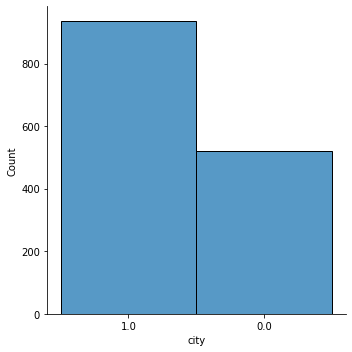

In [1403]:
sns.displot(train['city'])

In [1404]:
from collections import Counter

print(Counter(train.city))

Counter({'1.0': 936, '0.0': 520})


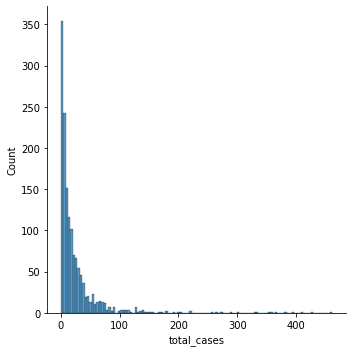

In [1405]:
sns.displot(train['total_cases'])

Define X, y and X_test

In [1406]:
y = train.total_cases.values

X = train.drop(['city', 'year', 'weekofyear', 'week_start_date', 'total_cases'], axis = 1).values
X_test = test.drop(['city', 'year', 'weekofyear', 'week_start_date'], axis = 1).values

Split train dataset for training and validation

In [1407]:
from sklearn.model_selection import train_test_split

# Split into validation and training data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1, shuffle = True)
X_train.shape, X_val.shape, y_train.shape,y_val.shape, X_test.shape

((1310, 21), (146, 21), (1310,), (146,), (416, 21))

StandardScaler

In [1408]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the validation set
X_val = scaler.transform(X_val)
# Scale the test set
X_test = scaler.transform(X_test)

In [1409]:
X_val.shape, X_train.shape, X_test.shape

((146, 21), (1310, 21), (416, 21))

Make pipeline

In [1410]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

model = AdaBoostRegressor(base_estimator=GradientBoostingRegressor(max_depth=5, min_samples_split=2, loss='ls',n_estimators=400, learning_rate=.1, random_state=1)).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9980469424167422


Make predictions

In [1411]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_val)
y_pred = y_pred.astype(int)
print(model.score(X_val, y_val)), print(r2_score(y_pred, model.predict(X_val)))

0.7695213391115869
0.9995307477721287


(None, None)

In [1412]:
y_pred

array([ 12,  50,  13,   5,  21,  23,   8,   1,  19,  12,  14,   7,   1,
        31,  16,  10,   9,   4,  45,  34,  11,  44,  12,   7,   8,  12,
         7, 112,   2,  14,  14,  17,  44,  21,  17,   4,  18,   9,  47,
         7,   5,  26,  40,  25,  17,  12,   5,  19,  23,  19,  17,  13,
         9,   8,  10,  27,   6,  11,  20,  12,  32,  28,   3,  33,   3,
        12,  15,   2,  12,  33,  28,  21,  11,  69,  53,  12,   8,  12,
         9,  33,  18,  30,   6,  24,  11,  21,   9,  15,  12,  26,  39,
         5,  30,   9,   6,  13,   8,  26,  11,  39,  18,  21,  18,   3,
         6,  77,   9,  33,   6,  12, 296,   8,  11,  25,   7,   9,  15,
        32,  20,  30,  12,  29,  19,  16,   3,  17,  75,  12,   6,  54,
         6,  61,  -1,  36,   2,  16,   8,   9,  18,   8,   6,  15,  24,
        43,  38,   8])

In [1413]:
df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred})
df

,Actual,Predicted
0,0,12
1,26,50
2,2,13
3,3,5
4,7,21
...,...,...
141,1,15
142,22,24
143,37,43
144,104,38


In [1414]:
final_labels = model.predict(X_test)
final_labels = final_labels.astype(int)
final_labels

array([13, 26,  6, 24, 19, 25, 25, 13, 23, 22, 25, 27, 24, 26, 24, 20, 29,
       29, 44, 29, 28, 32, 23, 30, 28, 22, 29, 25, 33, 33, 37, 23, 33, 38,
       11, 10, 17, 38,  9, 16, 15, 16, 22, 17,  8, 14, 15,  7,  6,  7,  7,
        5, 18,  6, 29, 24, 13, 13, 11, 18, 24, 35, 36, 34, 30, 26, 27, 26,
       25, 36, 36, 24, 26, 29, 32, 43, 37, 23, 16, 19, 29, 27, 21, 39, 45,
       39, 23,  4, 25, 20, 36, 25, 26, 11, 21, 14, 16, 18, 11, 20, 35, 14,
       17, 17, 25, 25, 31, 23, 26, 44, 44, 40, 26, 42, 48, 34, 33, 26, 40,
       38, 55, 47, 46, 52, 48, 39, 36, 35, 38, 43, 48, 27, 20, 40, 41, 37,
       10, 19, 18, 29, 25, 13, 43, 28, 25, 13, 15, 14, 21, 14, 13,  8, 10,
        5, 29, 11, 18, 35, 25,  9, 43, 26, 38, 30, 22, 16, 26, 28, 16, 37,
       22, 33, 21, 31, 32, 18, 28, 25, 29, 23, 20, 27, 20, 19, 16, 24, 44,
       40, 41, 55, 20, 36, 34, 45, 40, 23, 18, 20,  9, 20, 17,  6,  9,  3,
       14, 10, 10, 11,  6, 14, 39, 22, 13, 28, 24, 31, 42, 36, 30, 22, 22,
       28, 23, 21, 27, 35

In [1415]:
final_result = pd.DataFrame({'city': city, 'year': test.year, 'weekofyear': test.weekofyear,'total_cases': final_labels})

Submit

In [1416]:
final_result.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [1417]:
#upload submission
submission = pd.read_csv("submission.csv")
submission

,city,year,weekofyear,total_cases
0,sj,2008,18,13
1,sj,2008,19,26
2,sj,2008,20,6
3,sj,2008,21,24
4,sj,2008,22,19
...,...,...,...,...
411,iq,2013,22,9
412,iq,2013,23,8
413,iq,2013,24,4
414,iq,2013,25,3
